In [1]:
from matplotlib import pyplot as plt
import argparse
import cv2
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

from modules.take_roi import take_roi

(0.0, 300.0)

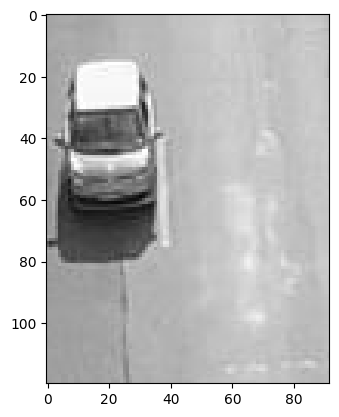

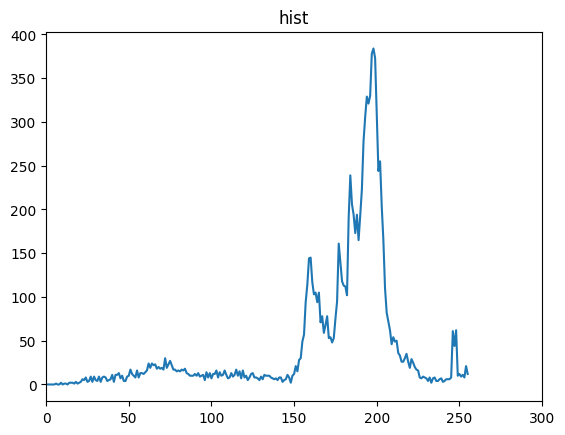

In [3]:
path = os.path.join('sample_images','img0000040.jpg')
img = cv2.imread(path)
# cv2.imshow("Image", img)
roi = take_roi(path)
# cv2.destroyAllWindows()

hist = cv2.calcHist([roi], [0], roi, [256], [0, 256])
plt.figure()
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR))
plt.figure()
plt.plot(hist)
plt.title("hist")
plt.xlim([0,300])

(0.0, 300.0)

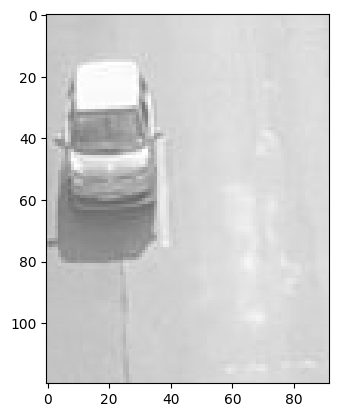

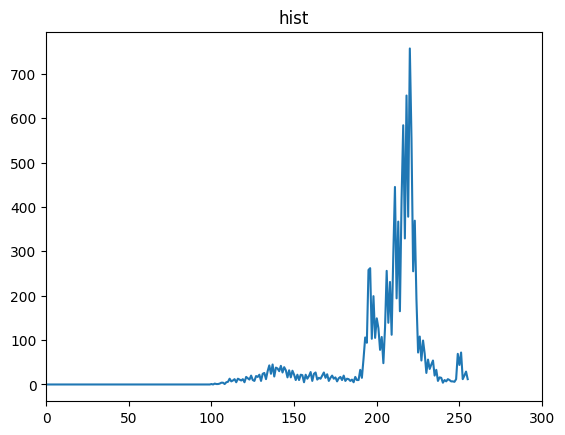

In [4]:

# Normalize the grayscale image
normalized = cv2.normalize(roi, None, 100, 255, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(cv2.cvtColor(normalized, cv2.COLOR_GRAY2BGR))
hist = cv2.calcHist([normalized], [0], normalized, [256], [0, 256])
plt.figure()
plt.plot(hist)
plt.title("hist")
plt.xlim([0,300])

(-1.0, 300.0)

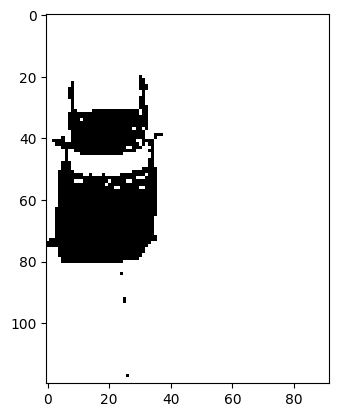

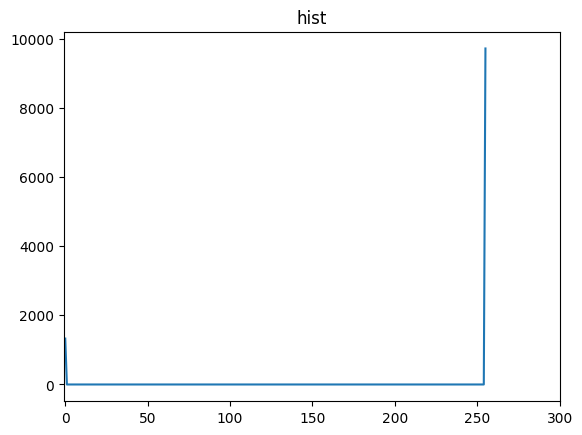

In [5]:
# Apply a threshold to the normalized image
_, threshold = cv2.threshold(normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure()
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR))
hist = cv2.calcHist([threshold], [0], None, [256], [0, 256])
plt.figure()
plt.plot(hist)
plt.title("hist")
plt.xlim([-1,300])

In [6]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
largest_area = cv2.contourArea(largest_contour)
if largest_area > 0.9 *len(roi) * len(roi[0]): 
    contours, hierarchy = cv2.findContours(~threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    largest_area = cv2.contourArea(largest_contour)
    if largest_area > 0.9 *len(roi) * len(roi[0]): 
        print('false')
    else: print('white ground')
else: print('black ground')

black ground


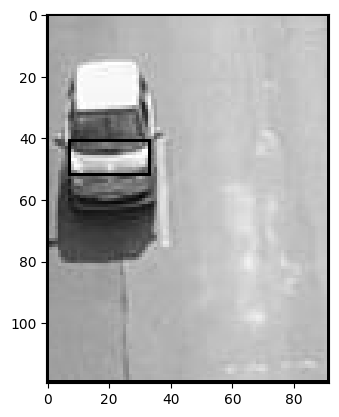

In [7]:
# contours, hierarchy = cv2.findContours(~threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
roi_with_contour = roi
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:
        x_min = min(contour[:, 0, 0])
        x_max = max(contour[:, 0, 0])
        y_min = min(contour[:, 0, 1])
        y_max = max(contour[:, 0, 1])
        cv2.rectangle(roi_with_contour,(x_min,y_min),(x_max,y_max),(0,255,0),1)
plt.figure()
plt.imshow(cv2.cvtColor(roi_with_contour , cv2.COLOR_GRAY2BGR))    